In [1]:
#%% Add to path
import sys
%cd ..

with open('python_paths.txt', 'r') as f:
    paths = f.read().splitlines()
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

        
print(sys.path)
print(sys.executable)

/media/theodore/HDD1/These/projets/superpixels
['/media/theodore/HDD1/These/projets/superpixels/Notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.7-linux-x86_64.egg', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/IPython/extensions', '/home/theodore/.ipython', './']
/media/theodore/HDD1/Spondi/SpondiDetect/venv/bin/python3


In [2]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

import src.plotter as p
import src.slic as slic


In [3]:
img_path = "./data/img.jpg"

img = plt.imread(img_path)
img = (img - img.min()) / (img.max() / img.min())

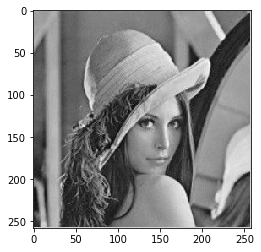

In [4]:
plt.imshow(img, cmap="gray")

In [5]:
reload(slic)
model = slic.SLIC(K=40, m=1, thresh=1, maxit=5)


Current iteration: 1 / 5. Error: 560.3305246447288
Current iteration: 2 / 5. Error: 189.02062990782483
Current iteration: 3 / 5. Error: 92.44287388413863
Current iteration: 4 / 5. Error: 44.59730763174244
Current iteration: 5 / 5. Error: 26.87765723905869


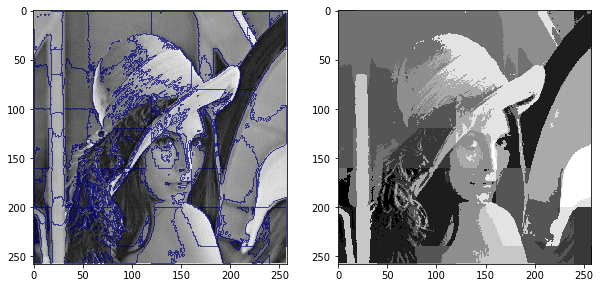

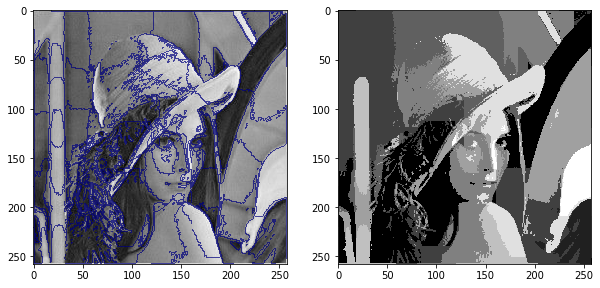

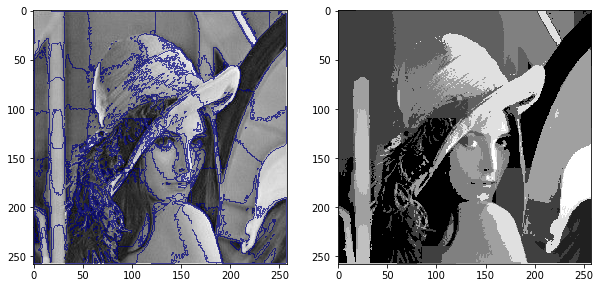

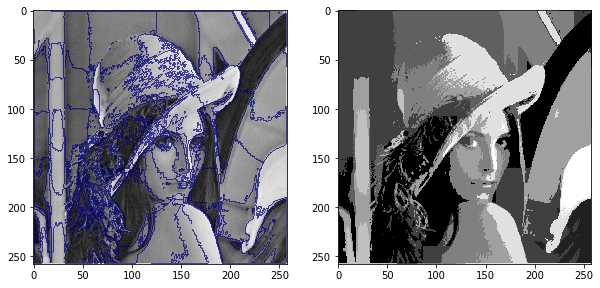

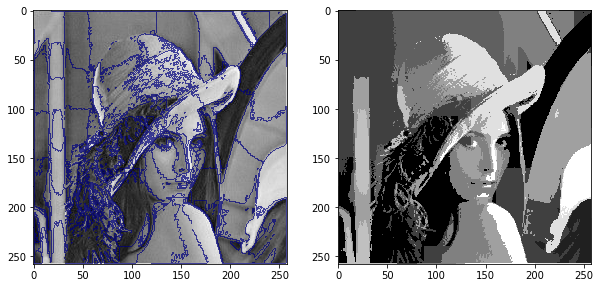

In [6]:
model.fit(img, True)

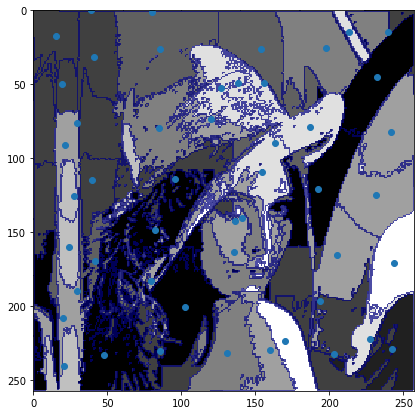

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
p.plot_img_mask_on_ax(ax, model.infer_superpixel_img(), model.infer_superpixel_edges())
ax.scatter(np.stack(model.centers)[:, 2], np.stack(model.centers)[:, 1])

ax.set_xlim(0, 257);
ax.set_ylim(257, 0);